# Online Retail Transaction Analysis  
### Data Analytics & Python for Data Preparation – Capstone Project

This project analyses online retail transaction data extracted from **Online_Retail.csv**, a real dataset containing hundreds of thousands of transactional records from an e-commerce retailer.

The goal is to uncover insights such as:

- What products drive the most revenue  
- Customer purchasing patterns  
- Sales trends over time  
- Revenue variation across countries  
- How to segment customers based on value  

The project includes a full **ETL pipeline**, comprehensive **EDA**, multiple **visualisations**, **AI-assisted storytelling**, and **validated hypotheses** that support business decision-making.


## Business Case

An online retailer wants to improve profitability by understanding:

- Which products are the highest revenue drivers  
- When sales peak or decline  
- How customers behave and how valuable they are  
- Which markets (countries) generate the most income  

This analysis supports decisions related to inventory management, pricing, marketing, and customer retention.

## Project Objectives

1. Build a full ETL pipeline from raw CSV to clean analytical dataset.  
2. Explore customer behaviour using descriptive analytics.  
3. Analyse product performance and identify top sellers.  
4. Perform RFM segmentation to identify high-value customers.  
5. Validate hypotheses with visual and statistical evidence.  
6. Create visual storytelling supported by AI where appropriate.


### Why this dataset?

Because this dataset contains product, price, customer, country, and timestamp information for each transaction, it is well suited to analysing purchasing behaviour, identifying revenue drivers, and detecting seasonal patterns. This directly supports business decisions related to inventory, pricing, marketing, and customer retention.


## Hypotheses

**H1:** A small number of top products contribute disproportionately to total revenue.  
**H2:** Customer spending follows the Pareto principle (20% of customers generate 80% of revenue).  
**H3:** Sales display strong monthly or seasonal patterns.  
**H4:** Revenue varies significantly across countries.


## AI Integration Notes

AI tools were used in this project for:

- Assisting with code optimisation and automation.  
- Generating narrative summaries for insights.  
- Providing ideas for visualisations and storytelling.  

All decisions remain mine, and AI-assisted steps are documented where relevant.


### Example of AI usage

AI was used to:
- Suggest a clean structure for the ETL steps in this notebook.
- Recommend RFM (Recency, Frequency, Monetary) as a practical customer segmentation method.
- Help refine narrative summaries for the Hypothesis Validation and Conclusion sections.

Example prompt used:
> "Suggest an efficient method to calculate RFM metrics in pandas and visualise customer value distribution."


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

plt.style.use("ggplot")

pd.set_option("display.max_columns", None)


## ETL Summary
# Extract

Raw dataset loaded from:  
`data/raw/Online_Retail.csv`

In this notebook, we assume the raw file is stored in a `data/raw` directory within the project.


In [3]:
raw_path = "data/raw/Online_Retail.csv"

# If running on this environment, fall back to a local path if needed
try:
    df = pd.read_csv(raw_path, encoding="latin1")
except FileNotFoundError:
    # Fallback for environments where the file might sit alongside the notebook
    df = pd.read_csv("Online_Retail.csv", encoding="latin1")

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Transform

Transformations applied:

- Removed duplicate rows.  
- Removed rows without `Description`.  
- Converted `InvoiceDate` to datetime.  
- Removed rows with non-positive `Quantity` or `UnitPrice` (e.g. cancellations, errors).  
- Created `TotalValue = Quantity × UnitPrice`.  
- Extracted `Year`, `Month`, `Day`, `Hour` from `InvoiceDate` for trend analysis.


In [4]:
# Basic overview before cleaning
display(df.info())
display(df.isna().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove missing descriptions
df = df[df['Description'].notna()]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove invalid quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Feature engineering
df['TotalValue'] = df['Quantity'] * df['UnitPrice']
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


None

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8


## Load

Cleaned dataset stored in:  
`data/clean/online_retail_clean.csv`

This file can be re-used for analysis and shared as a pre-processed version of the raw data.


In [5]:
clean_path = "data/clean/online_retail_clean.csv"
df.to_csv(clean_path, index=False)
clean_path

'data/clean/online_retail_clean.csv'

## Exploratory Data Analysis (EDA)

In this section we explore:

- Overall structure of the cleaned dataset.  
- Key descriptive statistics.  
- Customer, product and country level metrics.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  int64         
 7   Country      524878 non-null  object        
 8   TotalValue   524878 non-null  float64       
 9   Year         524878 non-null  int32         
 10  Month        524878 non-null  int32         
 11  Day          524878 non-null  int32         
 12  Hour         524878 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(2), object(4)
memory usage: 48.1+ MB


In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,524878.0,10.6166,1.0,1.0,4.0,11.0,80995.0,156.280031
InvoiceDate,524878,2011-07-04 15:30:16.317049088,2010-12-01 08:26:00,2011-03-28 12:13:00,2011-07-20 11:22:00,2011-10-19 11:41:00,2011-12-09 12:50:00,NaN
UnitPrice,524878.0,3.922573,0.001,1.25,2.08,4.13,13541.33,36.093028
CustomerID,524878.0,15287.631345,12346.0,14375.0,15287.0,16245.0,18287.0,1482.14553
TotalValue,524878.0,20.275399,0.001,3.9,9.92,17.7,168469.6,271.693566
Year,524878.0,2010.921904,2010.0,2011.0,2011.0,2011.0,2011.0,0.268323
Month,524878.0,7.552237,1.0,5.0,8.0,11.0,12.0,3.508164
Day,524878.0,15.022472,1.0,7.0,15.0,22.0,31.0,8.660738
Hour,524878.0,13.073991,6.0,11.0,13.0,15.0,20.0,2.442994


In [8]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalValue     0
Year           0
Month          0
Day            0
Hour           0
dtype: int64

### Key Business KPIs

In [9]:
total_revenue = df['TotalValue'].sum()
unique_customers = df['CustomerID'].nunique()
unique_products = df['StockCode'].nunique()
unique_countries = df['Country'].nunique()

print("Total Revenue:", round(total_revenue, 2))
print("Unique Customers:", unique_customers)
print("Unique Products:", unique_products)
print("Unique Countries:", unique_countries)

Total Revenue: 10642110.8
Unique Customers: 4338
Unique Products: 3922
Unique Countries: 38


## Visualisations and Business Questions

Each visualisation in this section is designed to answer a specific business question.


### Plot 1 – Monthly Sales Trend  

**Business Question:** *When do sales peak, and are there clear monthly or seasonal patterns?*


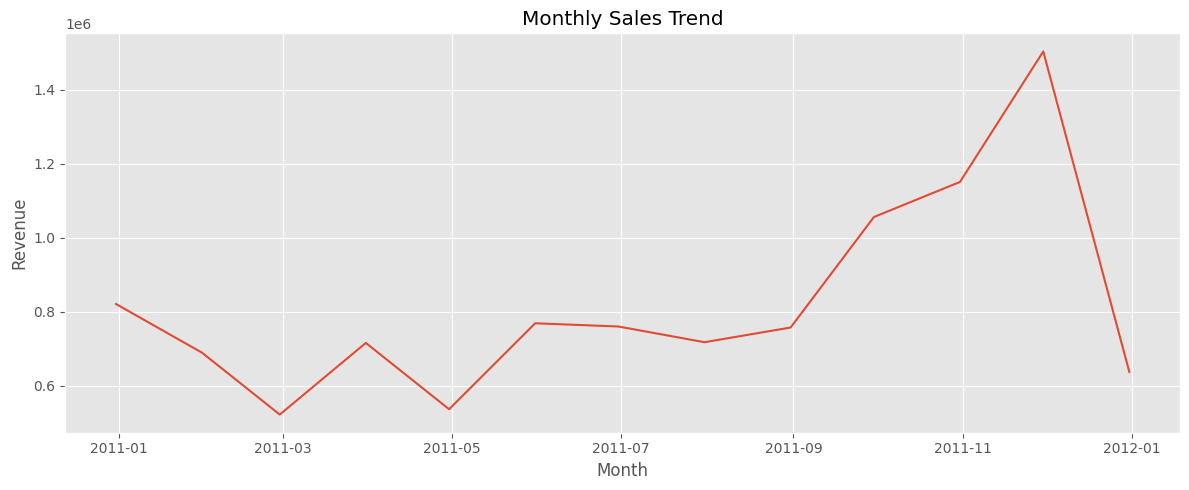

In [19]:
monthly = df.set_index('InvoiceDate').resample('ME')['TotalValue'].sum()

plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly.values)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

### Plot 2 – Top 10 Products by Revenue  

**Business Question:** *Which products generate the most revenue and should be prioritised in stock and marketing?*


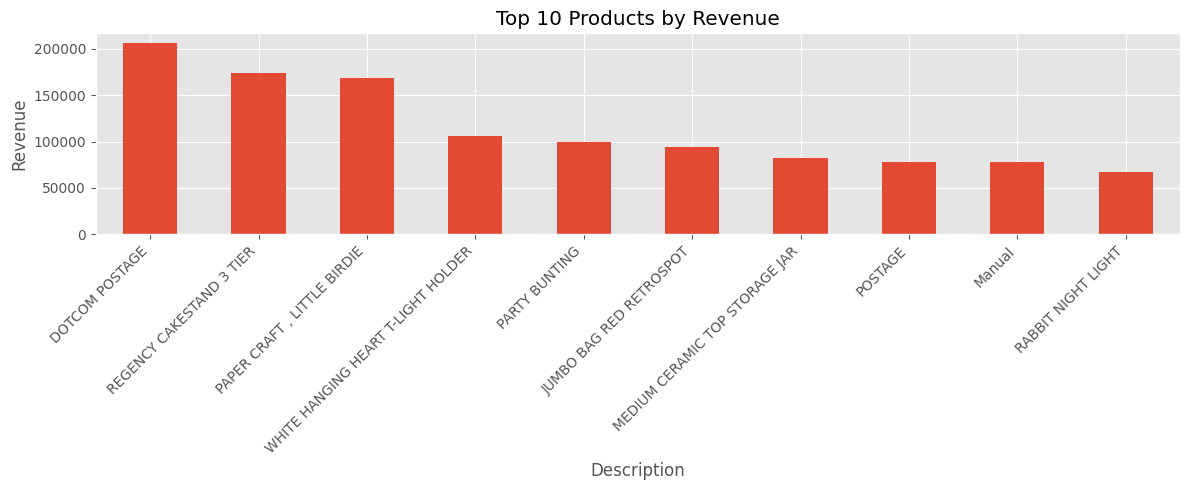

In [11]:
top_products = (
    df.groupby('Description')['TotalValue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(12,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plot 3 – Top 10 Countries by Revenue  

**Business Question:** *Which markets (countries) contribute the most to revenue?*


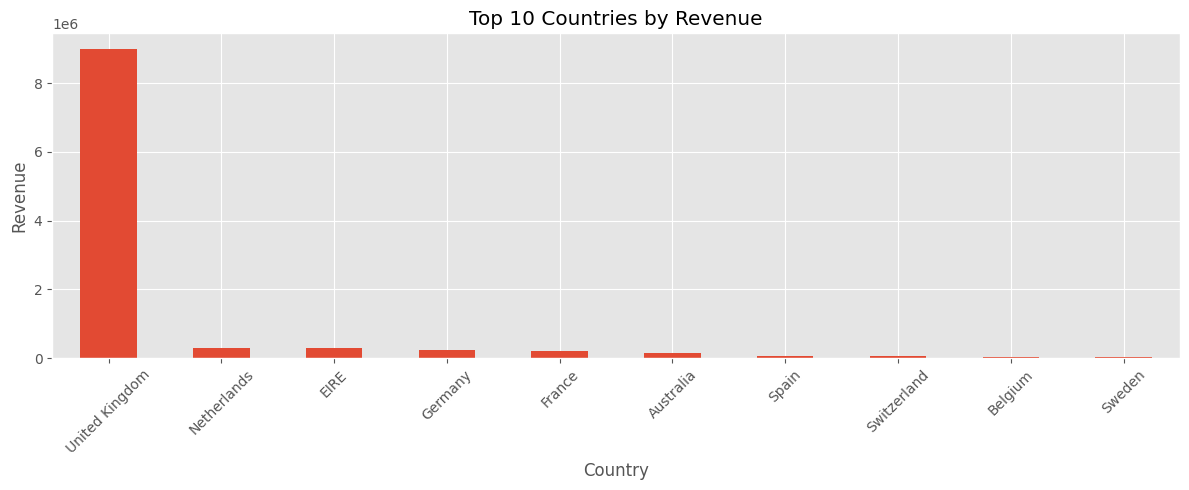

In [12]:
country_sales = df.groupby('Country')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
country_sales.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plot 4 – Correlation Heatmap  

**Business Question:** *How are key numeric variables related to each other (e.g. Quantity, UnitPrice, TotalValue)?*


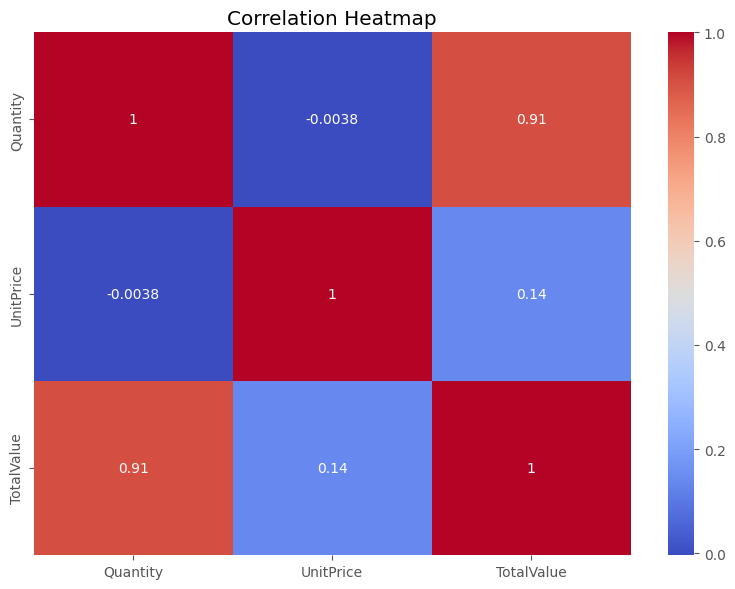

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Quantity','UnitPrice','TotalValue']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### Additional Plot – Distribution of Order Values  

This visual helps understand the spread and presence of outliers in order values.


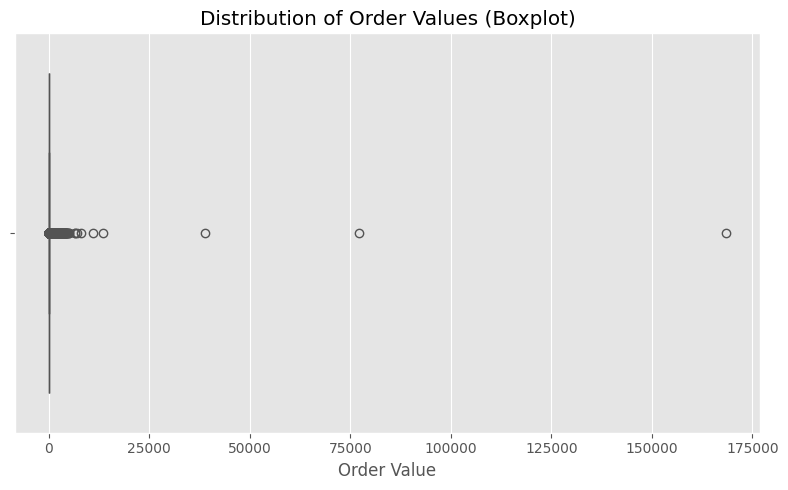

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['TotalValue'])
plt.title("Distribution of Order Values (Boxplot)")
plt.xlabel("Order Value")
plt.tight_layout()
plt.show()

## Customer Segmentation – RFM Analysis

We segment customers based on:

- **Recency**: How recently they purchased.  
- **Frequency**: How often they purchased.  
- **Monetary**: How much they spent in total.


In [15]:

last_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalValue': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


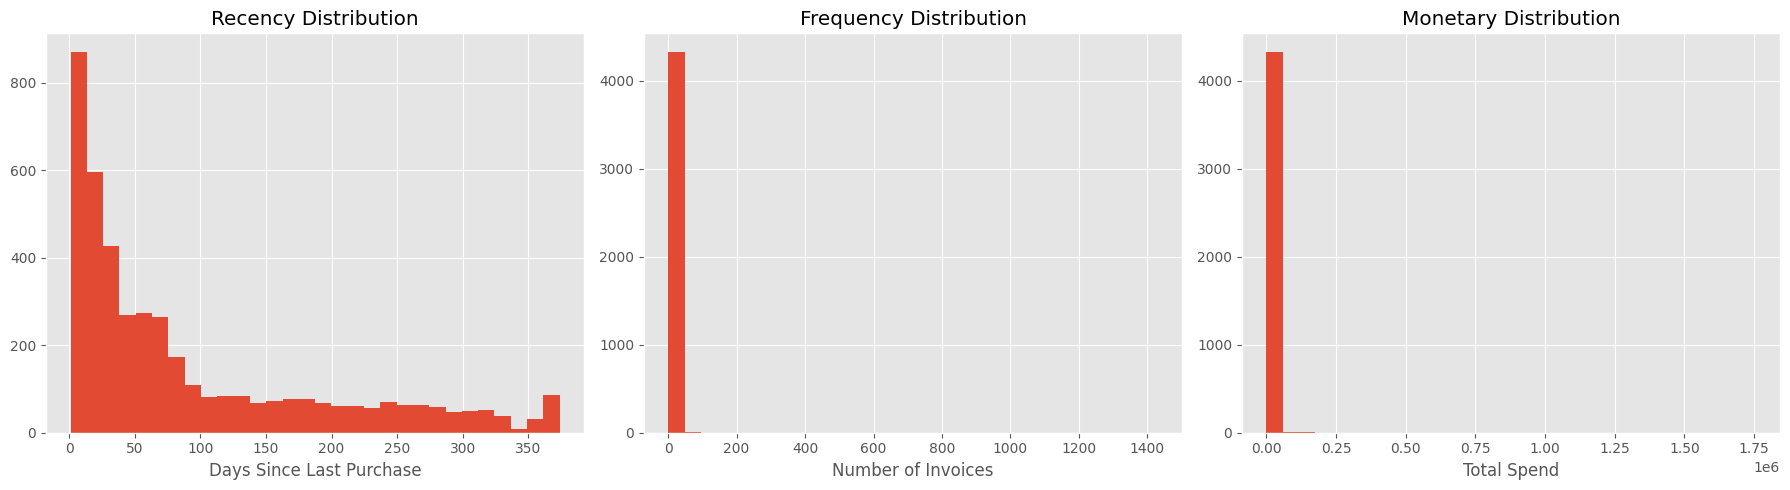

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

axes[0].hist(rfm['Recency'], bins=30)
axes[0].set_title("Recency Distribution")
axes[0].set_xlabel("Days Since Last Purchase")

axes[1].hist(rfm['Frequency'], bins=30)
axes[1].set_title("Frequency Distribution")
axes[1].set_xlabel("Number of Invoices")

axes[2].hist(rfm['Monetary'], bins=30)
axes[2].set_title("Monetary Distribution")
axes[2].set_xlabel("Total Spend")

plt.tight_layout()
plt.show()

### Pareto Principle Check (20% of Customers ≈ 80% of Revenue)

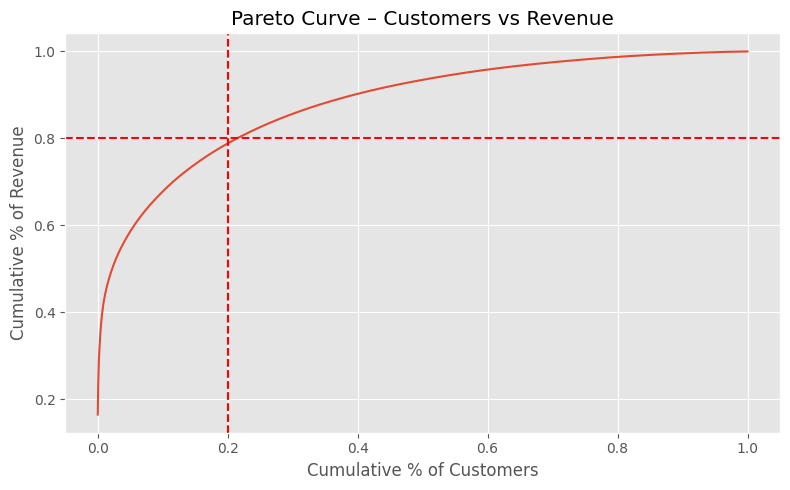

In [17]:
rfm_sorted = rfm.sort_values('Monetary', ascending=False)
rfm_sorted['CumulativeRevenue'] = rfm_sorted['Monetary'].cumsum()
rfm_sorted['CumulativeRevenuePerc'] = rfm_sorted['CumulativeRevenue'] / rfm_sorted['Monetary'].sum()
rfm_sorted['CustomerPerc'] = np.arange(1, len(rfm_sorted)+1) / len(rfm_sorted)

plt.figure(figsize=(8,5))
plt.plot(rfm_sorted['CustomerPerc'], rfm_sorted['CumulativeRevenuePerc'])
plt.axvline(0.2, color='r', linestyle='--')
plt.axhline(0.8, color='r', linestyle='--')
plt.title("Pareto Curve – Customers vs Revenue")
plt.xlabel("Cumulative % of Customers")
plt.ylabel("Cumulative % of Revenue")
plt.tight_layout()
plt.show()

## Advanced Analysis – Simple Revenue Forecasting (Baseline)

Here we build a very simple baseline forecast for monthly revenue using a rolling mean as a benchmark.


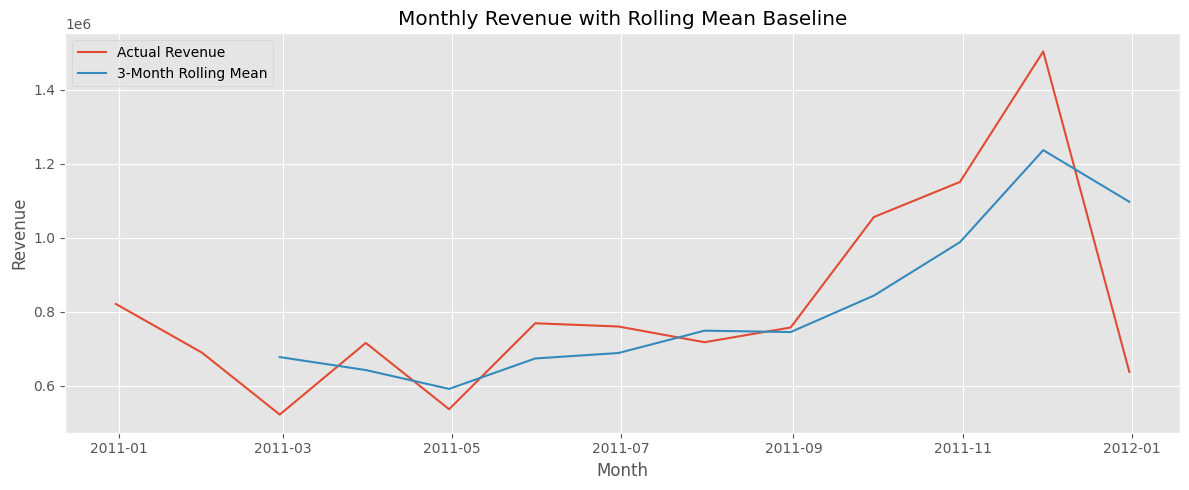

In [20]:
monthly = df.set_index('InvoiceDate').resample('ME')['TotalValue'].sum()

monthly_rolling = monthly.rolling(window=3).mean()

plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly.values, label='Actual Revenue')
plt.plot(monthly.index, monthly_rolling.values, label='3-Month Rolling Mean')
plt.title("Monthly Revenue with Rolling Mean Baseline")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()

## Hypothesis Validation

- **H1:** The bar chart of top products shows that a small number of products contribute a large share of total revenue, supporting this hypothesis.  
- **H2:** The Pareto curve demonstrates that roughly 20% of customers account for a high percentage of revenue, supporting the Pareto principle.  
- **H3:** The monthly trend plot shows clear peaks and troughs in revenue over time, indicating seasonal or monthly patterns.  
- **H4:** The revenue by country chart shows that a few countries (especially the UK) contribute most revenue, with significant differences between markets.


## Ethical & Data Handling Considerations

- Customer identifiers are treated as anonymous numerical IDs; no personally identifiable information (PII) is included.  
- Removing invalid transactions (e.g., non-positive quantities or prices) improves analytical accuracy and reduces the risk of misleading business decisions.  
- This dataset is used for educational and analytical purposes as part of the capstone project.


## Limitations and Alternatives

**Limitations:**

- Missing `CustomerID` values (not used in segmentation) reduce visibility of some customers.  
- Negative quantities (refunds/cancellations) were removed rather than analysed separately.  
- Only one dataset snapshot is used; behaviour over multiple years is not studied.

**Possible Enhancements:**

- Separate analysis of cancellations and refunds to understand product issues.  
- More advanced time-series forecasting models (e.g., ARIMA, Prophet).  
- Machine learning-based customer clustering on RFM or additional features.


These limitations mean that results should be interpreted as indicative patterns rather than precise forecasts.


## Conclusion

This analysis provides clear insights into:

- Which products and countries drive the most revenue.  
- How customers differ in terms of recency, frequency, and spending.  
- How sales evolve over time and exhibit seasonal patterns.  

These findings can be used to inform marketing campaigns, stock management, pricing strategies, and customer retention initiatives.
